## Author - Azab Ammar Ahmad
### Data Science & Business Analytics intern at The Sparks Foundation #GRIPSEPT22
### Task 6 - Prediction using Decision Tree Algorithm

We will work on 'iris' dataset, create a Decision Tree classifier and visualize it graphically.

Dataset URL: https://bit.ly/3kXTdox

Solution steps:


1.   Read data
2.   Data cleaning
3.   Prepare data (features and target lists)
4.   Split data into training and testing sets
5.   Train the DT classifier
6.   Visualize the classifier
7.   Testing DT on unseen data (test set)
8.   Evaluate the model


## Mount to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data

In [2]:
import pandas as pd

# read data
iris_df = pd.read_csv('drive/MyDrive/TSF-GRIP/Task6/Iris.csv')
print("Data has been read successfully\n")

#display first few rows of data
iris_df.head()

Data has been read successfully



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we can see the output is a summary includes list of all columns with their data types and the number of non-null values in each column.

We notice that:

*   No variable column has null/missing values
*   There are four columns represents the features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) each of them has numerical values
*   The last column(Species) represent the target

## Data cleaning

### remove unnecessary column

In [4]:
# Drop the 'Id' column 'cause it is not useful here
iris_df.drop('Id', axis = 1, inplace = True)
iris_df.columns # get remaining columns names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### check for duplications

In [5]:
print("dataframe shape before remove duplications: ", iris_df.shape)

# Check for duplicate values
print("number of duplications: ", iris_df.duplicated().sum())

# Drops the rows with similar entries
iris_df.drop_duplicates(inplace = True) 
print("dataframe shape after remove duplications: ", iris_df.shape)

dataframe shape before remove duplications:  (150, 5)
number of duplications:  3
dataframe shape after remove duplications:  (147, 5)


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## Prepare data for classification

In [7]:
# Get the unique values at 'Species' field which represent targets
target_names = iris_df['Species'].unique()
print("Unique labels before encoding ", target_names)

# Encoding 'Species' column which is the target with value between 0 and 2 using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['Labels'] = le.fit_transform(iris_df['Species'])
print("Unique labels after encoding ", iris_df['Labels'].unique())

Unique labels before encoding  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Unique labels after encoding  [0 1 2]


In [8]:
# feature list
X = iris_df.iloc[:,:-2]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# We will use it later
feature_names = X.columns
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [10]:
#target list
y = iris_df['Labels'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 120, shuffle=True, stratify=iris_df['Labels'])

## Train the Decision Tree Algorithm

Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. (This definition from geeksforgeeks, for more explanation https://www.geeksforgeeks.org/decision-tree/)

In [12]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


## Visualize the Decision Tree to understand it better
There are many ways for DT visualization I have plot it with sklearn.tree.plot_tree



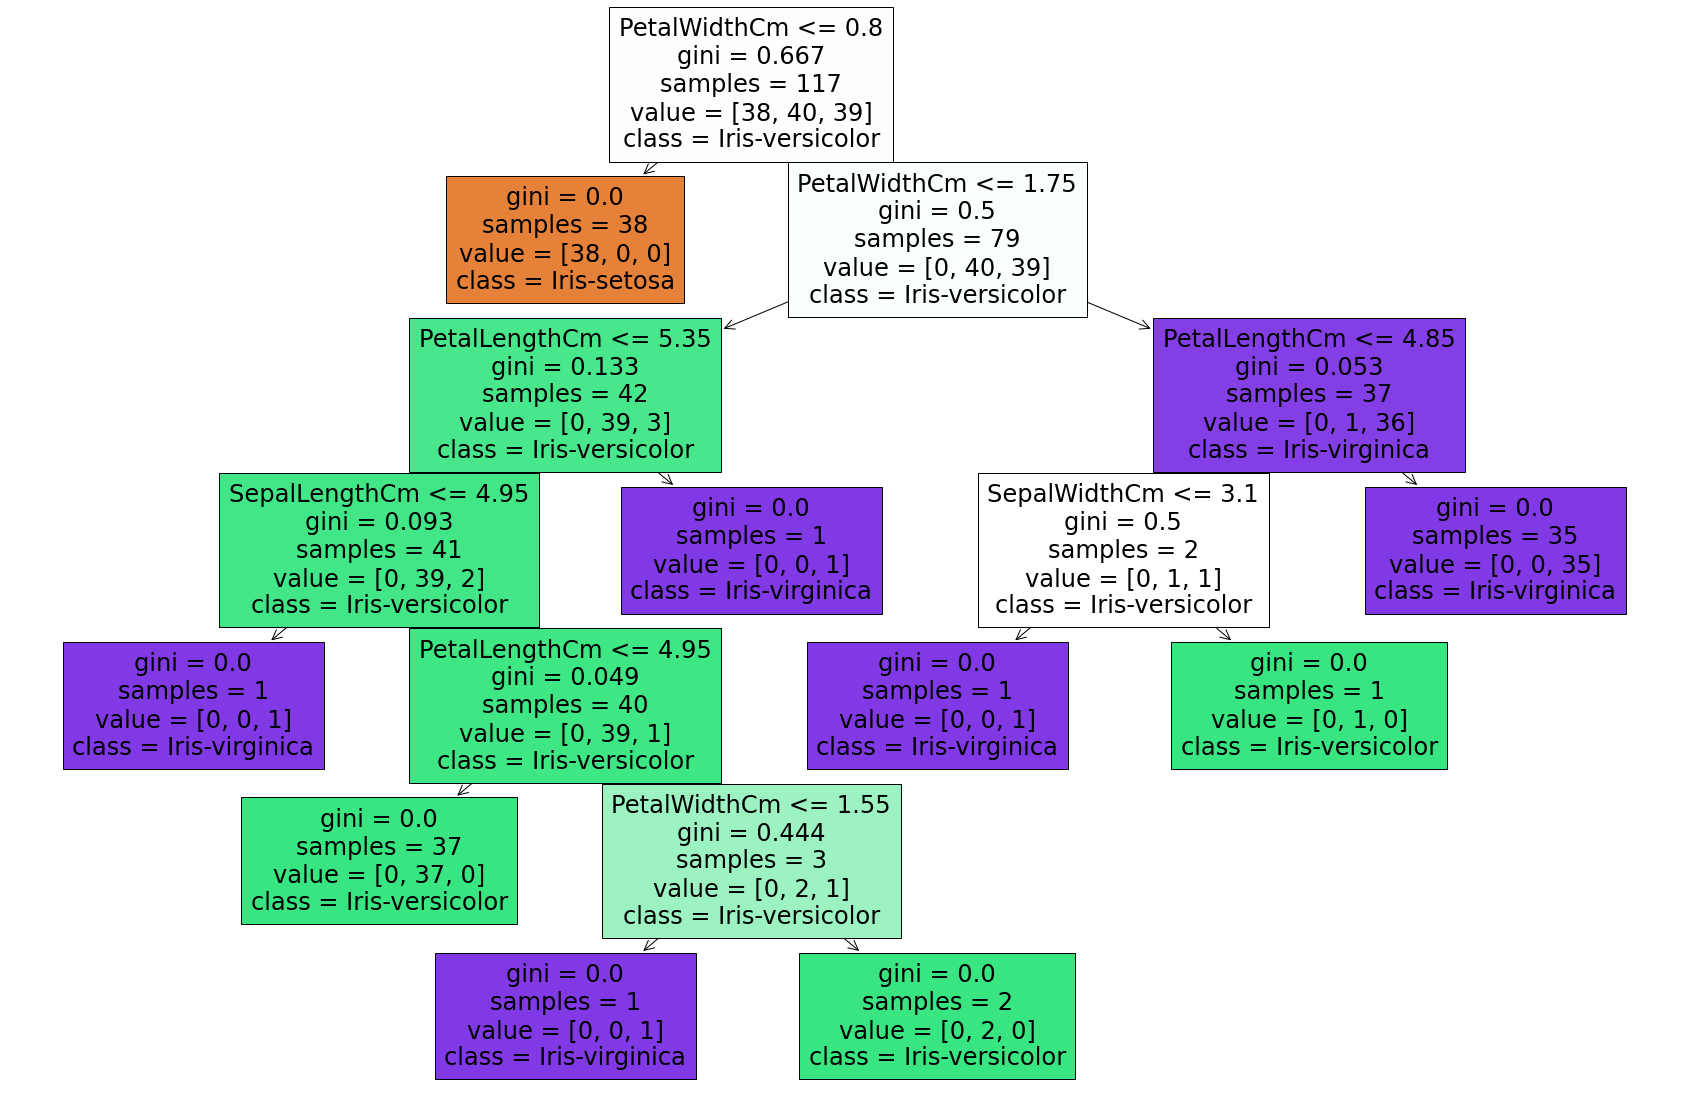

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(DT, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

## Predicting with DT


In [14]:
pred = DT.predict(x_test)
pred

array([0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 0, 0, 2, 1])

## Model Evaluation

In [15]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

